In [10]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import chi2_contingency, pearsonr, spearmanr

# Font settings
mpl.rcParams['font.family'] = 'NanumGothic'
mpl.rcParams['axes.unicode_minus'] = False  # Prevent minus sign issues


orgDf = pd.read_csv('../../datasets/realEstate.csv')
orgDf.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Con/ Con


In [11]:

# 1) SalePrice vs GarageArea

editDf = orgDf[['SalePrice', 'GarageArea', '2ndFlrSF']]

crosstab_price_GarArea = pd.crosstab(editDf['SalePrice'], editDf['GarageArea'])

# 카이제곱 검정
chi2, p_value = chi2_contingency(crosstab_price_GarArea)[:2]

# 크래머 V 계수
n = crosstab_price_GarArea.sum().sum()
min_dim = min(crosstab_price_GarArea.shape) - 1
cramers_v = np.sqrt(chi2 / (n * min_dim))


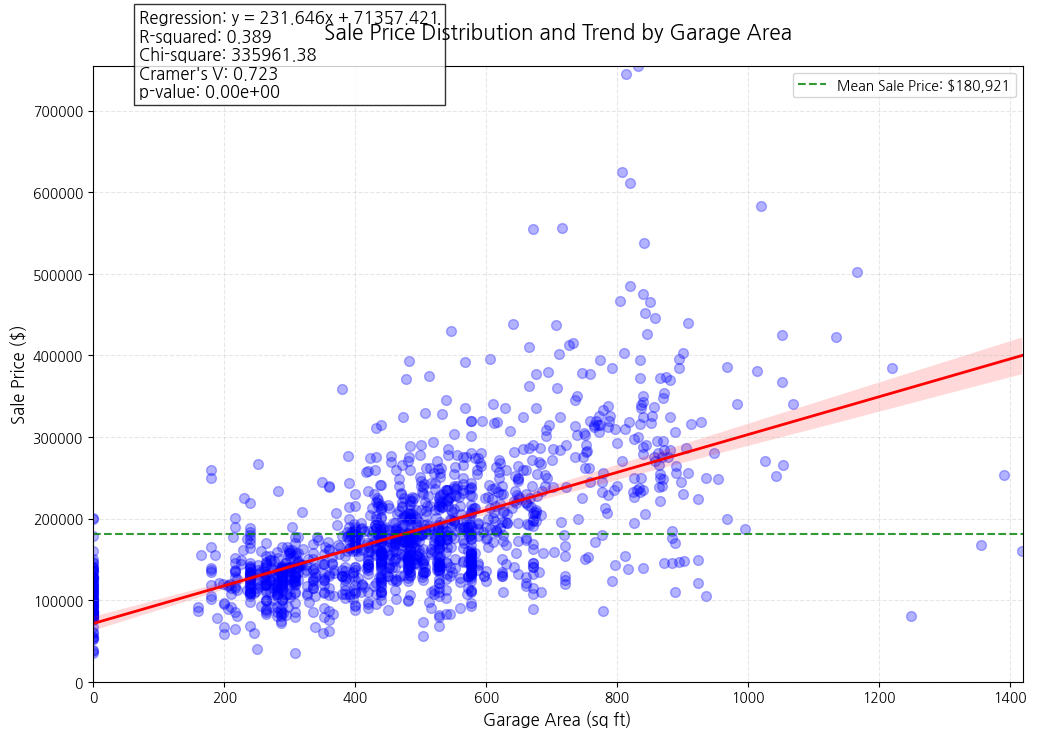


=== Data Summary ===
• Mean Sale Price: $180,921.20 (SD: $79,442.50)
• Mean Garage Area: 472.98 sq ft (SD: 213.80)
• Garage Area Range: 0 - 1418 sq ft
• Sale Price Range: $34,900 - $755,000

=== Relationship Analysis ===
• Correlation: moderate positive correlation (coefficient: 0.623)
• Chi-square statistic: 335961.38
• Cramer's V: 0.723
• For each sq ft increase in garage area, sale price changes by $231.65 on average
• Model explanation power: 38.9%
• Statistical significance: significant (p-value: 0.00e+00)


In [12]:
# 1) SalePrice vs GarageArea Analysis

# Create cross-tabulation of sale price and garage area
crosstab_price_GarArea = pd.crosstab(editDf['SalePrice'], editDf['GarageArea'])

# Perform chi-square test
chi2, p_value = chi2_contingency(crosstab_price_GarArea)[:2]

# Calculate Cramer's V coefficient
n = crosstab_price_GarArea.sum().sum()
min_dim = min(crosstab_price_GarArea.shape) - 1
cramers_v = np.sqrt(chi2 / (n * min_dim))

# Visualization settings
plt.figure(figsize=(12, 8))

# Create scatter plot with regression line
sns.regplot(data=editDf, 
            x='GarageArea', 
            y='SalePrice',
            scatter_kws={'alpha':0.3, 'color': 'blue', 's': 50},
            line_kws={'color': 'red', 'linewidth': 2},
            ci=95)

# Add mean sale price line
mean_price = editDf['SalePrice'].mean()
plt.axhline(y=mean_price, 
            color='green', 
            linestyle='--', 
            alpha=0.8,
            label=f'Mean Sale Price: ${mean_price:,.0f}')

# Graph styling
plt.title('Sale Price Distribution and Trend by Garage Area', size=15, pad=20)
plt.xlabel('Garage Area (sq ft)', size=12)
plt.ylabel('Sale Price ($)', size=12)
plt.grid(True, alpha=0.3, linestyle='--')
plt.xlim(editDf['GarageArea'].min()-1, editDf['GarageArea'].max()+1)
plt.ylim(0, editDf['SalePrice'].max()+5)

# Statistical analysis results
# Regression analysis
slope, intercept, r_value, p_value_reg, std_err = stats.linregress(editDf['GarageArea'], editDf['SalePrice'])

# Add statistical information
stats_text = (
    f'Regression: y = {slope:.3f}x + {intercept:.3f}\n'
    f'R-squared: {r_value**2:.3f}\n'
    f'Chi-square: {chi2:.2f}\n'
    f'Cramer\'s V: {cramers_v:.3f}\n'
    f'p-value: {p_value:.2e}'
)

plt.text(0.05, 0.95, stats_text,
         transform=plt.gca().transAxes,
         bbox=dict(facecolor='white', alpha=0.8),
         fontsize=12)

plt.legend()
plt.show()

# Print statistical results
print("\n=== Data Summary ===")
print(f"• Mean Sale Price: ${mean_price:,.2f} (SD: ${editDf['SalePrice'].std():,.2f})")
print(f"• Mean Garage Area: {editDf['GarageArea'].mean():.2f} sq ft (SD: {editDf['GarageArea'].std():.2f})")
print(f"• Garage Area Range: {editDf['GarageArea'].min():.0f} - {editDf['GarageArea'].max():.0f} sq ft")
print(f"• Sale Price Range: ${editDf['SalePrice'].min():,.0f} - ${editDf['SalePrice'].max():,.0f}")

print("\n=== Relationship Analysis ===")
# Determine correlation strength
if abs(r_value) < 0.3:
    strength = "weak"
elif abs(r_value) < 0.7:
    strength = "moderate"
else:
    strength = "strong"

direction = "positive" if r_value > 0 else "negative"

print(f"• Correlation: {strength} {direction} correlation (coefficient: {r_value:.3f})")
print(f"• Chi-square statistic: {chi2:.2f}")
print(f"• Cramer's V: {cramers_v:.3f}")
print(f"• For each sq ft increase in garage area, sale price changes by ${slope:.2f} on average")
print(f"• Model explanation power: {r_value**2:.1%}")
print(f"• Statistical significance: {'significant' if p_value < 0.05 else 'not significant'} (p-value: {p_value:.2e})")


1. 가격 분포 분석:
- 평균 주택 판매가격은 $180,921이며, 표준편차는 $79,442입니다
주택 가격은 최소 $34,900부터 최대 $755,000까지 매우 넓은 범위를 보입니다
이는 다양한 가격대의 주택이 시장에 존재함을 의미합니다

2. 차고 면적 분포:
- 평균 차고 면적은 473 평방피트이며, 표준편차는 214 평방피트입니다
차고가 없는 집(0 평방피트)부터 매우 큰 차고(1,418 평방피트)까지 다양합니다

3. 상관관계 분석:

- 차고 면적과 주택 가격은 중간 정도의 양의 상관관계(0.623)를 보입니다
이는 차고 면적이 증가할수록 주택 가격도 대체로 증가하는 경향이 있음을 의미합니다

4. 영향력 분석:

- 차고 면적이 1평방피트 증가할 때마다 평균적으로 주택 가격이 $231.65 상승합니다
모델의 설명력은 38.9%로, 주택 가격 변동의 약 39%가 차고 면적으로 설명됩니다

5. 통계적 유의성:

- p-value가 매우 낮아(0.00) 이 관계는 통계적으로 매우 유의미합니다
Cramer's V 값이 0.723으로 높아, 두 변수 간의 연관성이 강함을 보여줍니다

6. 결론:

- 차고 면적은 주택 가격 결정에 중요한 요소 중 하나이며, 더 큰 차고를 가진 주택이 일반적으로 더 높은 가격에 판매됩니다. 하지만 이는 전체 가격 변동의 39% 정도만 설명하므로, 주택 가격에는 차고 면적 외에도 다른 중요한 요인들이 영향을 미친다고 볼 수 있습니다.

In [13]:
# 2) SalePrice vs GarageArea

editDf = orgDf[['2ndFlrSF', 'GarageArea']]

crosstab_2ndFlrSF_GarArea = pd.crosstab(editDf['2ndFlrSF'], editDf['GarageArea'])

# 카이제곱 검정
chi2, p_value = chi2_contingency(crosstab_2ndFlrSF_GarArea)[:2]

# 크래머 V 계수
n = crosstab_price_GarArea.sum().sum()
min_dim = min(crosstab_price_GarArea.shape) - 1
cramers_v = np.sqrt(chi2 / (n * min_dim))

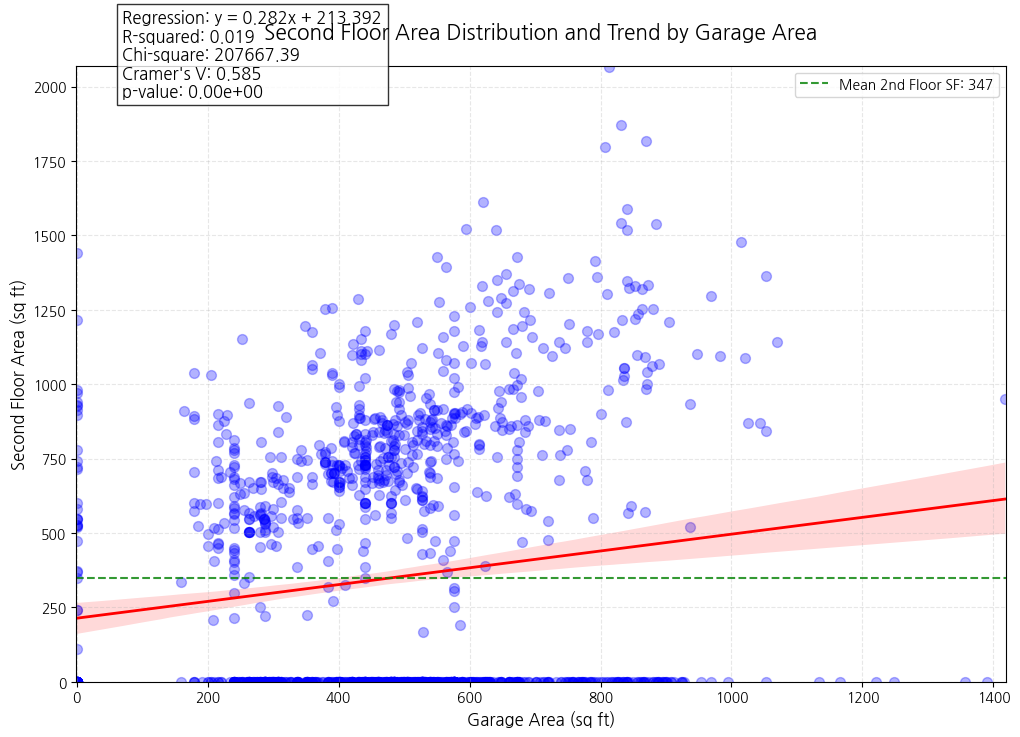


=== Data Summary ===
• Mean Second Floor Area: 346.99 sq ft (SD: 436.53)
• Mean Garage Area: 472.98 sq ft (SD: 213.80)
• Garage Area Range: 0 - 1418 sq ft
• Second Floor Area Range: 0 - 2065 sq ft

=== Relationship Analysis ===
• Correlation: weak positive correlation (coefficient: 0.138)
• Chi-square statistic: 207667.39
• Cramer's V: 0.585
• For each sq ft increase in garage area, second floor area changes by 0.28 sq ft on average
• Model explanation power: 1.9%
• Statistical significance: significant (p-value: 0.00e+00)


In [14]:
# 2) 2ndFlrSF vs GarageArea Analysis

# Create cross-tabulation of second floor area and garage area
crosstab_2ndFlrSF_GarArea = pd.crosstab(editDf['2ndFlrSF'], editDf['GarageArea'])

# Perform chi-square test
chi2, p_value = chi2_contingency(crosstab_2ndFlrSF_GarArea)[:2]

# Calculate Cramer's V coefficient 
n = crosstab_2ndFlrSF_GarArea.sum().sum()
min_dim = min(crosstab_2ndFlrSF_GarArea.shape) - 1
cramers_v = np.sqrt(chi2 / (n * min_dim))

# Visualization settings
plt.figure(figsize=(12, 8))

# Create scatter plot with regression line
sns.regplot(data=editDf, 
            x='GarageArea', 
            y='2ndFlrSF',
            scatter_kws={'alpha':0.3, 'color': 'blue', 's': 50},
            line_kws={'color': 'red', 'linewidth': 2},
            ci=95)

# Add mean second floor area line
mean_2ndFlrSF = editDf['2ndFlrSF'].mean()
plt.axhline(y=mean_2ndFlrSF, 
            color='green', 
            linestyle='--', 
            alpha=0.8,
            label=f'Mean 2nd Floor SF: {mean_2ndFlrSF:,.0f}')

# Graph styling
plt.title('Second Floor Area Distribution and Trend by Garage Area', size=15, pad=20)
plt.xlabel('Garage Area (sq ft)', size=12)
plt.ylabel('Second Floor Area (sq ft)', size=12)
plt.grid(True, alpha=0.3, linestyle='--')
plt.xlim(editDf['GarageArea'].min()-1, editDf['GarageArea'].max()+1)
plt.ylim(0, editDf['2ndFlrSF'].max()+5)

# Statistical analysis results
# Regression analysis
slope, intercept, r_value, p_value_reg, std_err = stats.linregress(editDf['GarageArea'], editDf['2ndFlrSF'])

# Add statistical information
stats_text = (
    f'Regression: y = {slope:.3f}x + {intercept:.3f}\n'
    f'R-squared: {r_value**2:.3f}\n'
    f'Chi-square: {chi2:.2f}\n'
    f'Cramer\'s V: {cramers_v:.3f}\n'
    f'p-value: {p_value:.2e}'
)

plt.text(0.05, 0.95, stats_text,
         transform=plt.gca().transAxes,
         bbox=dict(facecolor='white', alpha=0.8),
         fontsize=12)

plt.legend()
plt.show()

# Print statistical results
print("\n=== Data Summary ===")
print(f"• Mean Second Floor Area: {mean_2ndFlrSF:,.2f} sq ft (SD: {editDf['2ndFlrSF'].std():,.2f})")
print(f"• Mean Garage Area: {editDf['GarageArea'].mean():.2f} sq ft (SD: {editDf['GarageArea'].std():.2f})")
print(f"• Garage Area Range: {editDf['GarageArea'].min():.0f} - {editDf['GarageArea'].max():.0f} sq ft")
print(f"• Second Floor Area Range: {editDf['2ndFlrSF'].min():.0f} - {editDf['2ndFlrSF'].max():.0f} sq ft")

print("\n=== Relationship Analysis ===")
# Determine correlation strength
if abs(r_value) < 0.3:
    strength = "weak"
elif abs(r_value) < 0.7:
    strength = "moderate"
else:
    strength = "strong"

direction = "positive" if r_value > 0 else "negative"

print(f"• Correlation: {strength} {direction} correlation (coefficient: {r_value:.3f})")
print(f"• Chi-square statistic: {chi2:.2f}")
print(f"• Cramer's V: {cramers_v:.3f}")
print(f"• For each sq ft increase in garage area, second floor area changes by {slope:.2f} sq ft on average")
print(f"• Model explanation power: {r_value**2:.1%}")
print(f"• Statistical significance: {'significant' if p_value < 0.05 else 'not significant'} (p-value: {p_value:.2e})")


1. 면적 분포 분석:
- 2층 평균 면적은 347 평방피트이며, 표준편차가 437 평방피트로 매우 큽니다
차고 평균 면적은 473 평방피트이며, 표준편차는 214 평방피트입니다
두 공간 모두 최소 0 평방피트부터 시작하여, 2층은 최대 2,065 평방피트, 차고는 1,418 평방피트까지 분포합니다
2. 변동성 분석:
- 2층 면적의 표준편차(437)가 평균(347)보다 크다는 것은 2층 면적의 변동성이 매우 크다는 것을 의미합니다
이는 2층이 없는 집부터 매우 큰 2층을 가진 집까지 다양한 형태의 주택이 존재함을 보여줍니다
3. 상관관계 분석:
- 차고 면적과 2층 면적은 약한 양의 상관관계(0.138)를 보입니다
이는 두 공간의 크기가 서로 거의 독립적으로 결정된다는 것을 의미합니다
4. 영향력 분석:
- 차고 면적이 1평방피트 증가할 때 2층 면적은 평균 0.28 평방피트 증가합니다
모델의 설명력이 1.9%로 매우 낮아, 차고 면적으로 2층 면적을 예측하기는 어렵습니다
5. 통계적 의미:
- p-value가 매우 낮아 통계적으로는 유의미하지만, 실제적인 연관성은 매우 약합니다
Cramer's V 값이 0.585로 중간 정도의 연관성을 보여줍니다
6. 결론:
- 차고 면적과 2층 면적 사이에는 통계적으로 유의미한 관계가 있지만, 실질적인 연관성은 매우 약합니다. 이는 주택 설계에서 차고와 2층의 크기가 서로 독립적으로 결정되며, 한 공간의 크기가 다른 공간의 크기에 큰 영향을 미치지 않는다는 것을 시사합니다. 따라서 주택 설계나 가치 평가 시 이 두 요소는 독립적으로 고려되어야 할 것입니다.

P-Value에따라 A. 차고크기와 주택 가격의 관계, B. 차고크기와 2층의 면적의 크기의 관계는 통계적으로는 유의미합니다. 즉, 귀무가설입니다~